<a href="https://colab.research.google.com/github/ShivamBhosale/Tensorflow/blob/master/Transfer_Learning_tf_(Cats_N_Dogs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers

In [38]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-09-25 15:28:28--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  92.4MB/s    in 0.9s    

2020-09-25 15:28:29 (92.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [39]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [40]:
import os

In [41]:
local_weights_file ='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' 

In [42]:
pre_trained_model=InceptionV3( input_shape=(150,150,3),
                                include_top=False,
                                weights=None
)
  


In [43]:
pre_trained_model.load_weights(local_weights_file)

In [44]:
for layer in pre_trained_model.layers:
  layer.trainable=False

In [45]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


<h2>Create and Comple the model</h2>

In [46]:
from tensorflow.keras.optimizers import RMSprop

In [47]:
# A different approch in creating the Neurons
x=layers.Flatten()(last_output)
#Using same variable create a Dense Layer
x=layers.Dense(1024,activation='relu')(x)
# Add a dropout rate of 0.2
x=layers.Dropout(0.2)(x)
#output Neuron
x=layers.Dense(1,activation='sigmoid')(x)

In [48]:
model=Model(pre_trained_model.inputs,x)

In [49]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h3>Now we get download the cats and dogs zip file and process the images using ImageDataGenerator</h3>

In [50]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

--2020-09-25 15:28:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   222MB/s    in 0.3s    

2020-09-25 15:28:32 (222 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
import os
import zipfile

In [53]:
local_zip = '//tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [54]:
# Define our example directories and files
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [55]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [56]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [57]:
#Data-Augmentaion in ImageGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255.,
    rotation_range=0.4,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

In [58]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [59]:
train_generator=train_datagen.flow_from_directory(
  train_dir,
  batch_size=20,
  class_mode='binary',
  target_size=(150,150)
)

Found 2000 images belonging to 2 classes.


In [60]:
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

Found 1000 images belonging to 2 classes.


<h2>Fit the Model </h2>

In [61]:
history=model.fit(train_generator,
                  validation_data = validation_generator,
                  steps_per_epoch=100,
                  epochs=20,
                  validation_steps=50,
                  verbose=2
    
)

Epoch 1/20
100/100 - 17s - loss: 1.3036 - accuracy: 0.8570 - val_loss: 0.2235 - val_accuracy: 0.9190
Epoch 2/20
100/100 - 17s - loss: 0.2949 - accuracy: 0.9110 - val_loss: 0.1822 - val_accuracy: 0.9400
Epoch 3/20
100/100 - 16s - loss: 0.2756 - accuracy: 0.9300 - val_loss: 0.1757 - val_accuracy: 0.9510
Epoch 4/20
100/100 - 16s - loss: 0.2115 - accuracy: 0.9425 - val_loss: 0.2090 - val_accuracy: 0.9470
Epoch 5/20
100/100 - 16s - loss: 0.2178 - accuracy: 0.9430 - val_loss: 0.1364 - val_accuracy: 0.9620
Epoch 6/20
100/100 - 16s - loss: 0.2502 - accuracy: 0.9380 - val_loss: 0.2132 - val_accuracy: 0.9450
Epoch 7/20
100/100 - 16s - loss: 0.2196 - accuracy: 0.9440 - val_loss: 0.1282 - val_accuracy: 0.9640
Epoch 8/20
100/100 - 16s - loss: 0.1668 - accuracy: 0.9520 - val_loss: 0.2810 - val_accuracy: 0.9380
Epoch 9/20
100/100 - 16s - loss: 0.1642 - accuracy: 0.9565 - val_loss: 0.2104 - val_accuracy: 0.9570
Epoch 10/20
100/100 - 16s - loss: 0.1671 - accuracy: 0.9595 - val_loss: 0.1752 - val_accura

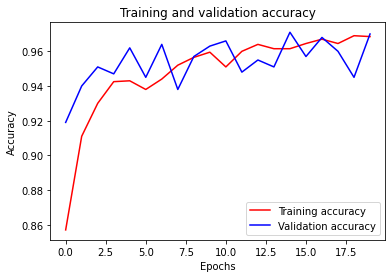

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 09.jpg to 09 (1).jpg
Saving 12.jpg to 12 (2).jpg
Saving 123.jpg to 123 (6).jpg
Saving cat34.jpg to cat34.jpg
[0.]
09.jpg is a cat


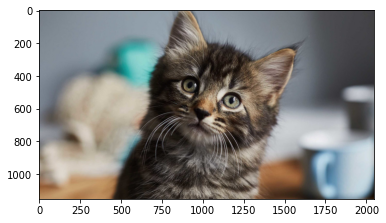

[1.]
12.jpg is a dog


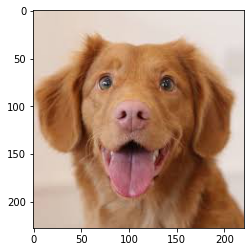

[1.]
123.jpg is a dog


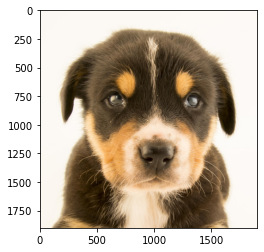

[0.]
cat34.jpg is a cat


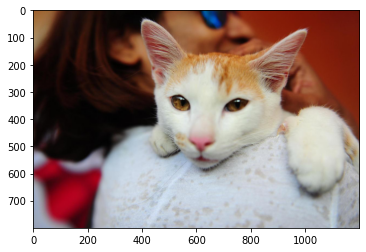

In [71]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    img = mpimg.imread(fn)
    plt.imshow(img)
    
  else:
    print(fn + " is a cat")
    img = mpimg.imread(fn)
    plt.imshow(img)
  plt.show()
